In [5]:
import re
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from gensim.models import KeyedVectors
from sklearn.manifold import TSNE

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:

train = pd.read_csv('Tweets.csv')


In [9]:
print(train.shape)

(14640, 15)


In [10]:
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
train.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [15]:
train[train['airline_sentiment'] == 'negative'].head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
20,570265883513384960,negative,0.6705,Can't Tell,0.3614,Virgin America,NaN,MISSGJ,NaN,0,@VirginAmerica why are your first fares in May...,NaN,2015-02-24 08:55:56 -0800,NaN,NaN
24,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,NaN,ayeevickiee,NaN,0,@VirginAmerica you guys messed up my seating.....,NaN,2015-02-24 08:18:51 -0800,714,Mountain Time (US & Canada)
25,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,NaN,Leora13,NaN,0,@VirginAmerica status match program. I applie...,NaN,2015-02-24 07:49:15 -0800,NaN,NaN
26,570239632807370753,negative,1.0000,Can't Tell,0.6614,Virgin America,NaN,meredithjlynn,NaN,0,@VirginAmerica What happened 2 ur vegan food o...,NaN,2015-02-24 07:11:37 -0800,NaN,NaN
28,570207886493782019,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,blackjackpro911,NaN,0,@VirginAmerica amazing to me that we can't get...,"[42.361016, -71.02000488]",2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN


In [16]:
train[train['airline_sentiment'] == 'positive'].head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York
12,570289584061480960,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica This is such a great deal! Alre...,NaN,2015-02-24 10:30:06 -0800,NYC,America/New_York
13,570287408438120448,positive,0.6451,NaN,NaN,Virgin America,NaN,mollanderson,NaN,0,@VirginAmerica @virginmedia I'm flying your #f...,NaN,2015-02-24 10:21:28 -0800,NaN,Eastern Time (US & Canada)
14,570285904809598977,positive,1.0000,NaN,NaN,Virgin America,NaN,sjespers,NaN,0,@VirginAmerica Thanks!,NaN,2015-02-24 10:15:29 -0800,"San Francisco, CA",Pacific Time (US & Canada)
16,570277724385734656,positive,1.0000,NaN,NaN,Virgin America,NaN,ItzBrianHunty,NaN,0,@VirginAmerica So excited for my first cross c...,NaN,2015-02-24 09:42:59 -0800,west covina,Pacific Time (US & Canada)
18,570270684619923457,positive,1.0000,NaN,NaN,Virgin America,NaN,thebrandiray,NaN,0,I ❤️ flying @VirginAmerica. ☺️👍,NaN,2015-02-24 09:15:00 -0800,Somewhere celebrating life.,Atlantic Time (Canada)


<Axes: >

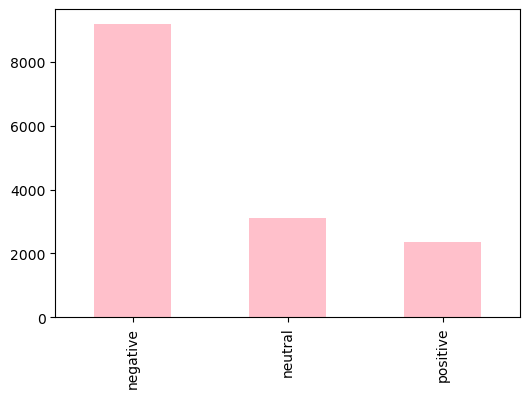

In [18]:
train['airline_sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

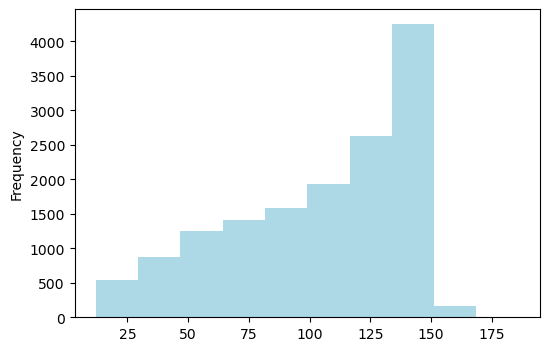

In [21]:
length_train = train['text'].str.len().plot.hist(color = 'lightblue', figsize = (6, 4))

In [22]:
train['len'] = train['text'].str.len()

In [23]:
train.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,len
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),135
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),79
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),108
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),47
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),80


In [27]:
train.groupby('airline_sentiment').describe()


tweet_id                                            \
                     count          mean           std           min   
airline_sentiment                                                      
negative            9178.0  5.692602e+17  7.572474e+14  5.675900e+17   
neutral             3099.0  5.691841e+17  8.068405e+14  5.675883e+17   
positive            2363.0  5.691006e+17  8.112476e+14  5.676555e+17   

                                                                           \
                            25%           50%           75%           max   
airline_sentiment                                                           
negative           5.686511e+17  5.695355e+17  5.698798e+17  5.703106e+17   
neutral            5.684852e+17  5.693080e+17  5.699305e+17  5.703093e+17   
positive           5.684331e+17  5.691980e+17  5.698788e+17  5.703093e+17   

                  airline_sentiment_confidence            ... retweet_count  \
                                         count      mean  ...           75%   
airline_sentiment                                         ...                 
negative                                9178.0  0.933365  ...           0.0   
neutral                                 3099.0  0.823303  ...           0.0   
positive                                2363.0  0.872039  ...           0.0   

                            len                                            \
                    max   count        mean        std   min   25%    50%   
airline_sentiment                                                           
negative           44.0  9178.0  113.947919  30.719006  12.0  96.0  126.0   
neutral            28.0  3099.0   87.359471  37.682903  12.0  57.0   87.0   
positive           22.0  2363.0   86.082945  39.482103  12.0  52.0   86.0   

                                 
                     75%    max  
airline_sentiment                
negative           138.0  176.0  
neutral            123.0  167.0  
positive           124.0  186.0  

[3 rows x 40 columns]

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

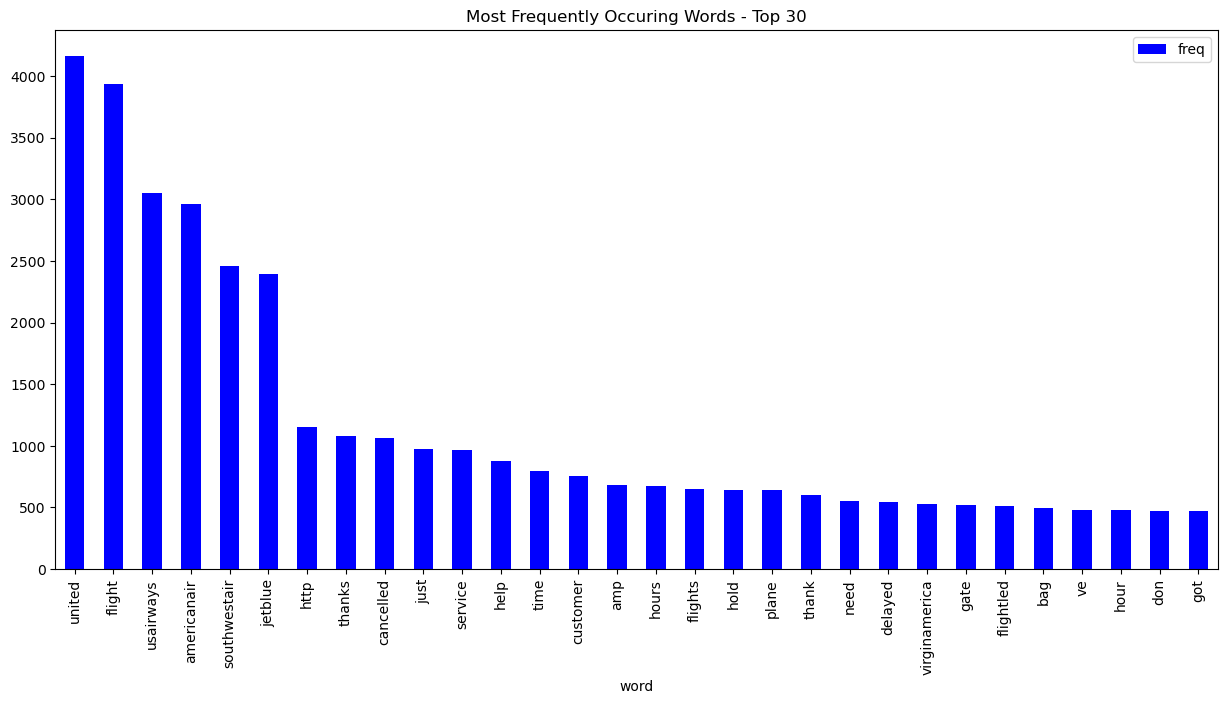

In [29]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")